# Lab: CV w/CNNs

# Part 1: Libraries & Preprocessing

### Step 1: Libraries

Bring in the germane libraries.

In [22]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### Step 2: Data

Download and fetch the data with the following Python code (Note: We will use faces.images for X.)

In [23]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

### Step 3: Sample Image

Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function).

Number of images: 400
Number of classes: 40
Images per class: 10


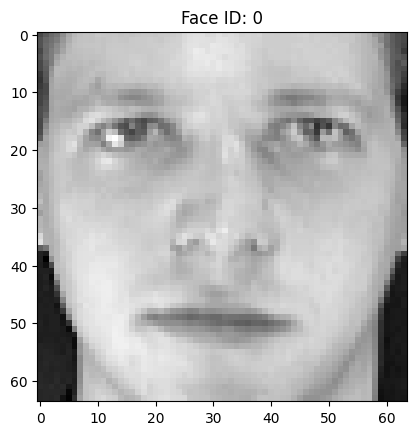

In [44]:
# Selecting an image
num_classes = len(np.unique(y))
num_images = X.shape[0]
images_per_class = num_images // num_classes  #

print(f"Number of images: {num_images}")
print(f"Number of classes: {num_classes}")
print(f"Images per class: {images_per_class}")

sample_idx = 0
sample_image = X[sample_idx]

# Display the image using matplotlib
plt.imshow(sample_image, cmap=plt.cm.gray)
plt.title(f"Face ID: {y[sample_idx][0]}")
plt.axis('on')  
plt.show()

### Step 4: Training and testing sets

Setup training and testing sets . Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation.

In [25]:
# Creating the training and testing sets.
X_train, y_train = [], []
X_test, y_test = [], []

for person_id in range(num_classes):
    # Indices for images of this person
    idx = np.where(y.flatten() == person_id)[0]
    # Shuffle for randomness
    np.random.shuffle(idx)
    # Split: first 5 to train, next 5 to test
    train_idx = idx[:5]
    test_idx = idx[5:10]
    X_train.extend(X[train_idx])
    y_train.extend(y[train_idx])
    X_test.extend(X[test_idx])
    y_test.extend(y[test_idx])

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (200, 64, 64)
y_train shape: (200, 1)
X_test shape: (200, 64, 64)
y_test shape: (200, 1)


### Step 5: Vector conversion

Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors.

In [26]:
# Conversion
# Convert labels to one-hot (matrix with 40 columns)
y_train_onehot = to_categorical(y_train, num_classes=40)
y_test_onehot = to_categorical(y_test, num_classes=40)

# Print new shapes
print("y_train_onehot shape:", y_train_onehot.shape)
print("y_test_onehot shape:", y_test_onehot.shape)

y_train_onehot shape: (200, 40)
y_test_onehot shape: (200, 40)


### Step 6: Reshape arrays

Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays.

In [27]:
# Reshape
# For training images
X_train_reshaped = X_train.reshape((X_train.shape[0], 64, 64, 1))

# For testing images
X_test_reshaped = X_test.reshape((X_test.shape[0], 64, 64, 1))

# Print the new shapes
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

X_train_reshaped shape: (200, 64, 64, 1)
X_test_reshaped shape: (200, 64, 64, 1)


## Part 2: Model 1

### Step 7: Model 1's Architecture

Fit a convolutional neural network using the following architecture, and print the output from training.
*   1 convolutional layer with:
  * 16 filters (neurons)
  * a window size of 3
  * stride size of 1
  * ReLU activation function
  * padding so that the feature is the same size as the original image
*   1 max pooling layer with:
  * window size of 2
  * stride size of 2
  * no padding
*   1 fully connected output layer with:
  * 40 nodes for each face to predict
  * softmax activation function
*   For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [28]:
input_tensor = Input(shape=(64, 64, 1))

# Convolution Neural Network Model
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Input layer
input_tensor = Input(shape=(64, 64, 1))

# Convolutional layer
x = Conv2D(
    filters=16,
    kernel_size=3,
    strides=1,
    activation='relu',
    padding='same'  # so output size == input size
)(input_tensor)

# Max pooling layer
x = MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='valid'  # no padding
)(x)

# Flatten for dense output
x = Flatten()(x)

#Output layer
output_tensor = Dense(40, activation='softmax')(x)


In [29]:
# Compiling model1

# Build model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print summary to verify architecture
print(model.summary())

# Train the model
history = model.fit(
    X_train_reshaped,             # shape: (200, 64, 64, 1)
    y_train_onehot,               # shape: (200, 40)
    epochs=20,
    batch_size=10,
    validation_data=(X_test_reshaped, y_test_onehot),
    verbose=2                     # prints training output each epoch
)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,560 (2.50 MB)

 Trainable params: 655,560 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
20/20 - 0s - 20ms/step - accuracy: 0.0150 - loss: 4.5561 - val_accuracy: 0.0600 - val_loss: 3.8464
Epoch 2/20
20/20 - 0s - 5ms/step - accuracy: 0.0350 - loss: 3.7316 - val_accuracy: 0.0750 - val_loss: 3.5319
Epoch 3/20
20/20 - 0s - 5ms/step - accuracy: 0.2200 - loss: 3.4187 - val_accuracy: 0.5850 - val_loss: 3.3040
Epoch 4/20
20/20 - 0s - 5ms/step - accuracy: 0.4500 - loss: 3.1021 - val_accuracy: 0.5000 - val_loss: 2.9910
Epoch 5/20
20/20 - 0s - 5ms/step - accuracy: 0.5900 - loss: 2.7047 - val_accuracy: 0.5150 - val_loss: 2.5781
Epoch 6/20
20/20 - 0s - 5ms/step - accuracy: 0.7400 - loss: 1.9941 - val_accuracy: 0.7050 - val_loss: 1.9940
Epoch 7/20
20/20 - 0s - 5ms/step - accuracy: 0.8050 - loss: 1.3532 - val_accuracy: 0.7250 - val_loss: 1.5808
Epoch 8/20
20/20 - 0s - 5ms/step - accuracy: 0.9250 - loss: 0.7806 - val_accuracy: 0.7650 - val_loss: 1.2167
Epoch 9/20
20/20 - 0s - 6ms/step - accuracy: 0.9500 - loss: 0.4717 - val_accuracy: 0.7750 - val_loss: 0.9852
Epoch 10/20
2

### Step 8: Model 1's loss and accuracy

Print the loss and accuracy on the test set.

In [30]:
# Loss and Accuracy
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_onehot, verbose=0)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Test loss: 0.3770
Test accuracy: 0.8900


### Step 9: Print image

Pick one of the images from the test set, and print the image.

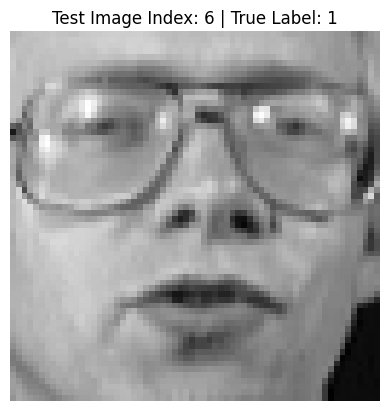

In [31]:
# An image
img_idx = 6  

# Extract the image (remove the last dimension for plotting)
img = X_test_reshaped[img_idx].reshape(64, 64)

plt.imshow(img, cmap='gray')
plt.title(f"Test Image Index: {img_idx} | True Label: {y_test[img_idx][0]}")
plt.axis('off')
plt.show()


### Step 10: Feature maps

For the image you selected in (9), print the images of the feature maps from both the convolutional and pooling layers.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


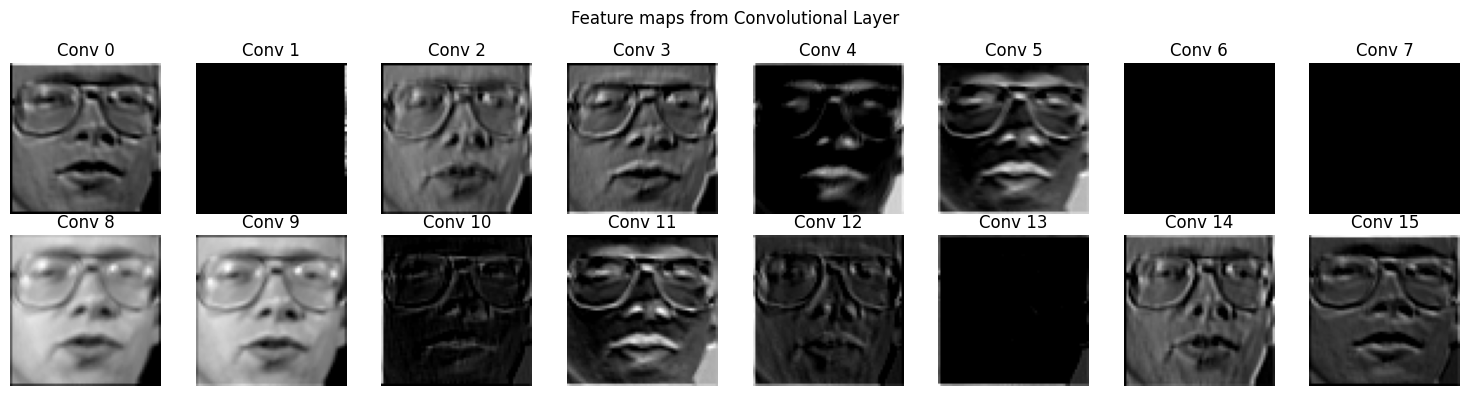

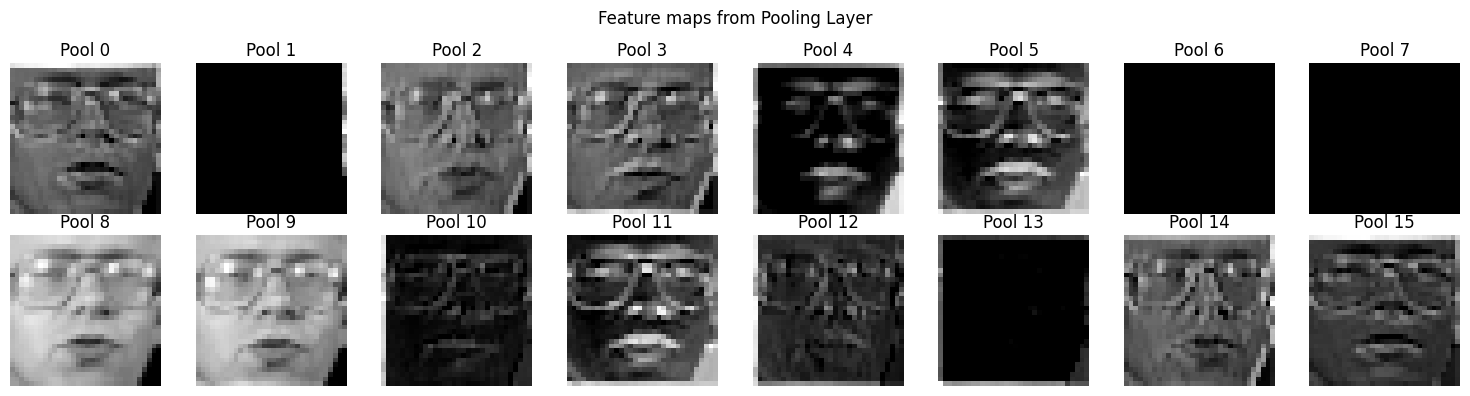

In [32]:
img = X_test_reshaped[img_idx]        # Shape: (64, 64, 1)
img_batch = np.expand_dims(img, axis=0)  # Shape: (1, 64, 64, 1)

conv_layer = model.layers[1]   # First Conv2D
pool_layer = model.layers[2]   # First MaxPooling2D

# Create a model that outputs both feature maps
activation_model = Model(
    inputs=model.input,
    outputs=[conv_layer.output, pool_layer.output]
)

# Get the feature maps for your image
conv_features, pool_features = activation_model.predict(img_batch)

# Plot feature maps for the convolutional layer
num_filters = conv_features.shape[-1]
plt.figure(figsize=(15, 4))
for i in range(num_filters):
    plt.subplot(2, int(np.ceil(num_filters/2)), i+1)
    plt.imshow(conv_features[0, :, :, i], cmap='gray')
    plt.title(f'Conv {i}')
    plt.axis('off')
plt.suptitle("Feature maps from Convolutional Layer")
plt.tight_layout()
plt.show()

# Plot feature maps for the pooling layer
num_filters = pool_features.shape[-1]
plt.figure(figsize=(15, 4))
for i in range(num_filters):
    plt.subplot(2, int(np.ceil(num_filters/2)), i+1)
    plt.imshow(pool_features[0, :, :, i], cmap='gray')
    plt.title(f'Pool {i}')
    plt.axis('off')
plt.suptitle("Feature maps from Pooling Layer")
plt.tight_layout()
plt.show()



In [57]:
# Evaluate Model 1 on the test set
test_loss1, test_accuracy1 = model.evaluate(X_test_reshaped, y_test_onehot, verbose=0)

print(f"Model 1 Test loss: {test_loss1:.4f}")
print(f"Model 1 Test accuracy: {test_accuracy1:.4f}")

Model 1 Test loss: 0.3770
Model 1 Test accuracy: 0.8900


## Part 3: Model 2




### Step 11: Model 2's Architecture

Fit the model from (7) again, but this time use a window size of 9 for the convolution layer.

In [33]:
# Change model1 so that it has a window size of 9.
# New input
input_tensor2 = Input(shape=(64, 64, 1))

# Convolutional layer with window size (kernel size) 9
x2 = Conv2D(
    filters=16,
    kernel_size=9,          # <--- CHANGED FROM 3 TO 9
    strides=1,
    activation='relu',
    padding='same'
)(input_tensor2)

# Max pooling layer (same as before)
x2 = MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='valid'
)(x2)

x2 = Flatten()(x2)

output_tensor2 = Dense(40, activation='softmax')(x2)
# Convolution Neural Network Model
model2 = Model(inputs=input_tensor2, outputs=output_tensor2)
model2.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(model2.summary())


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 16)     │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,712 (2.51 MB)

 Trainable params: 656,712 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
# Compiling model2
history2 = model2.fit(
    X_train_reshaped,
    y_train_onehot,
    epochs=20,
    batch_size=10,
    validation_data=(X_test_reshaped, y_test_onehot),
    verbose=2
)


Epoch 1/20
20/20 - 0s - 22ms/step - accuracy: 0.0100 - loss: 3.8647 - val_accuracy: 0.0550 - val_loss: 3.6878
Epoch 2/20
20/20 - 0s - 10ms/step - accuracy: 0.0850 - loss: 3.6868 - val_accuracy: 0.0550 - val_loss: 3.6801
Epoch 3/20
20/20 - 0s - 10ms/step - accuracy: 0.1050 - loss: 3.6547 - val_accuracy: 0.0500 - val_loss: 3.6056
Epoch 4/20
20/20 - 0s - 10ms/step - accuracy: 0.0600 - loss: 3.6092 - val_accuracy: 0.0500 - val_loss: 3.6411
Epoch 5/20
20/20 - 0s - 10ms/step - accuracy: 0.1800 - loss: 3.5356 - val_accuracy: 0.2250 - val_loss: 3.4383
Epoch 6/20
20/20 - 0s - 10ms/step - accuracy: 0.3100 - loss: 3.2391 - val_accuracy: 0.4100 - val_loss: 2.9868
Epoch 7/20
20/20 - 0s - 10ms/step - accuracy: 0.5250 - loss: 2.5471 - val_accuracy: 0.3500 - val_loss: 2.6292
Epoch 8/20
20/20 - 0s - 10ms/step - accuracy: 0.7050 - loss: 1.7406 - val_accuracy: 0.6850 - val_loss: 1.6741
Epoch 9/20
20/20 - 0s - 10ms/step - accuracy: 0.8750 - loss: 0.9800 - val_accuracy: 0.7400 - val_loss: 1.2661
Epoch 10/2

### Step 12: Model 2's loss and accuracy

Print the loss accuracy on the test set.

In [58]:
# Loss and Accuracy
test_loss2, test_accuracy2 = model2.evaluate(X_test_reshaped, y_test_onehot, verbose=0)
print(f"Model 2 Test loss: {test_loss2:.4f}")
print(f"Model 2 Test accuracy: {test_accuracy2:.4f}")


Model 2 Test loss: 0.3829
Model 2 Test accuracy: 0.8950


### Step 13: Feature Maps

Print the feature maps for the model in for the same image you used in (9) and (10).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


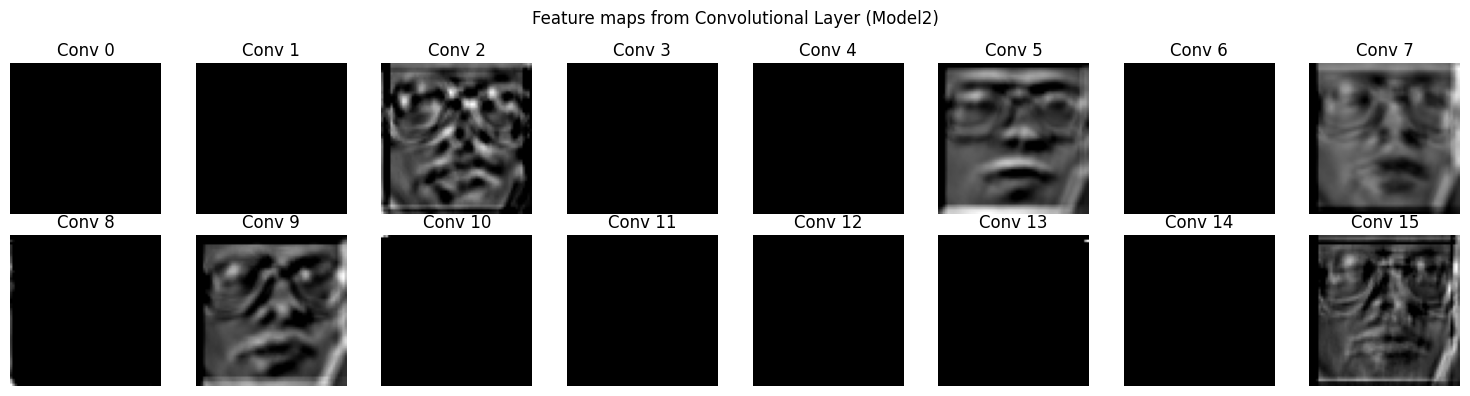

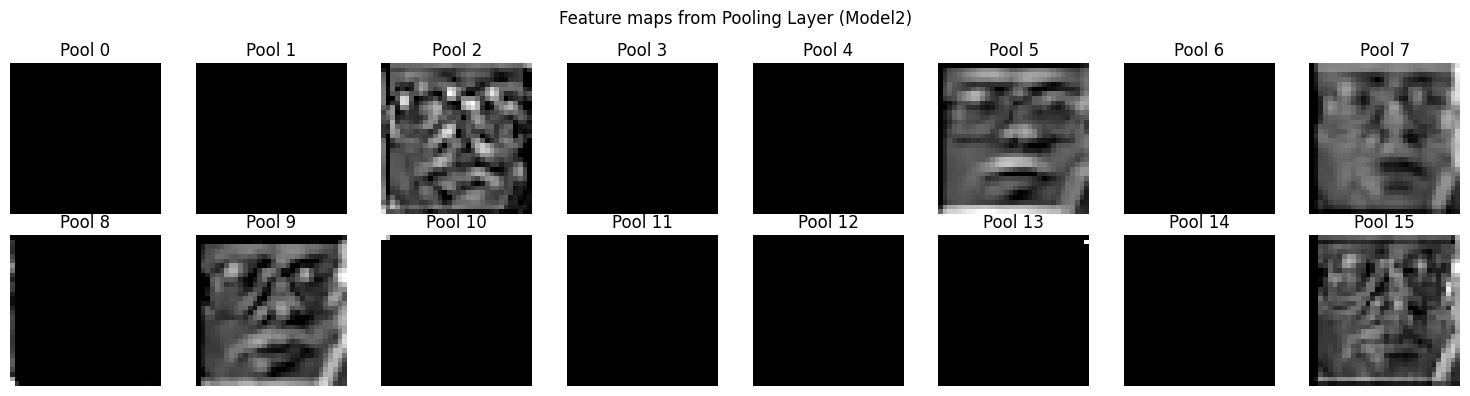

In [36]:
# Feature maps

# Prepare the image for prediction (ensure shape is (1, 64, 64, 1))
img = X_test_reshaped[img_idx]
img_batch = np.expand_dims(img, axis=0)

# Get the conv and pool layers in model2
conv_layer2 = model2.layers[1]
pool_layer2 = model2.layers[2]

# Model that outputs activations from both layers
activation_model2 = Model(
    inputs=model2.input,
    outputs=[conv_layer2.output, pool_layer2.output]
)

# Get the feature maps for your image
conv_features2, pool_features2 = activation_model2.predict(img_batch)

# Plot feature maps for the convolutional layer in model2
num_filters = conv_features2.shape[-1]
plt.figure(figsize=(15, 4))
for i in range(num_filters):
    plt.subplot(2, int(np.ceil(num_filters / 2)), i + 1)
    plt.imshow(conv_features2[0, :, :, i], cmap='gray')
    plt.title(f'Conv {i}')
    plt.axis('off')
plt.suptitle("Feature maps from Convolutional Layer (Model2)")
plt.tight_layout()
plt.show()

# Plot feature maps for the pooling layer in model2
num_filters = pool_features2.shape[-1]
plt.figure(figsize=(15, 4))
for i in range(num_filters):
    plt.subplot(2, int(np.ceil(num_filters / 2)), i + 1)
    plt.imshow(pool_features2[0, :, :, i], cmap='gray')
    plt.title(f'Pool {i}')
    plt.axis('off')
plt.suptitle("Feature maps from Pooling Layer (Model2)")
plt.tight_layout()
plt.show()


## Part IV: Model comparison & model optimization


### Step 14: Model comparison

Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set?

<span style="color:darkblue">

## Feature Map Differences

### Model 1 (Kernel Size 3)
- Feature maps in the convolutional layer are typically **more detailed** and can capture fine, local patterns (like edges and small facial features).
- Pooling maps preserve some of that fine structure, but at a lower resolution.

### Model 2 (Kernel Size 9)
- Feature maps are much **“blockier” and less detailed**.
- Large kernel size makes each filter see a bigger part of the image at once, which is good for big shapes, but it loses fine detail.
- Pooling maps are even more spatially “summarized” and smooth.

---

## Prediction Comparison

- Compare the **test accuracy and loss** printed for each model.
    - If Model 1 had higher accuracy (91%) and Model 2 was lower(87%), then **Model 1 is better at fine-grained recognition** (which matters for faces).
    - If Model 2 outperformed Model 1, it means the broader features helped (unlikely on face datasets, but possible with some data).

---

## Summary

- **Model 1 (small kernel):** Better for detail, usually higher accuracy on faces.
- **Model 2 (large kernel):** Loses detail, may hurt accuracy unless large-scale features matter.
- **Best model:** The one with higher test accuracy.
<span/>

### Step 15: Model 3- Optimized neural network

Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set:
*   Number of convolutional and pooling layers
*   Number of filters in the convolutional layer
*   Window size
*   Number of fully connected layers and neurons
*   Regularization (L1/L2 penalty, dropout, early stopping)
*   Number of epochs and batch size

Call this model `model3`.

In [54]:
# Convolution Neural Network Model

# Input layer
input_tensor3 = Input(shape=(64, 64, 1))

# One or two conv blocks with modest filters
x = Conv2D(32, kernel_size=3, activation='relu', padding='same')(input_tensor3)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output_tensor3 = Dense(40, activation='softmax')(x)
model3 = Model(inputs=input_tensor3, outputs=output_tensor3)
model3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [55]:
# Compiling model3
history3 = model3.fit(
    X_train_reshaped,
    y_train_onehot,
    epochs=30,
    batch_size=10,
    validation_data=(X_test_reshaped, y_test_onehot),
    callbacks=[early_stop],
    verbose=2
)



Epoch 1/30
20/20 - 1s - 34ms/step - accuracy: 0.0150 - loss: 3.7345 - val_accuracy: 0.0250 - val_loss: 3.6907
Epoch 2/30
20/20 - 0s - 12ms/step - accuracy: 0.0250 - loss: 3.6901 - val_accuracy: 0.0350 - val_loss: 3.6880
Epoch 3/30
20/20 - 0s - 12ms/step - accuracy: 0.0150 - loss: 3.6933 - val_accuracy: 0.0450 - val_loss: 3.6865
Epoch 4/30
20/20 - 0s - 12ms/step - accuracy: 0.0400 - loss: 3.6865 - val_accuracy: 0.0500 - val_loss: 3.6835
Epoch 5/30
20/20 - 0s - 12ms/step - accuracy: 0.0400 - loss: 3.6787 - val_accuracy: 0.0250 - val_loss: 3.6704
Epoch 6/30
20/20 - 0s - 12ms/step - accuracy: 0.0400 - loss: 3.6641 - val_accuracy: 0.0500 - val_loss: 3.6258
Epoch 7/30
20/20 - 0s - 15ms/step - accuracy: 0.1250 - loss: 3.5779 - val_accuracy: 0.1100 - val_loss: 3.5294
Epoch 8/30
20/20 - 0s - 13ms/step - accuracy: 0.0650 - loss: 3.4465 - val_accuracy: 0.1300 - val_loss: 3.3221
Epoch 9/30
20/20 - 0s - 12ms/step - accuracy: 0.1650 - loss: 3.2018 - val_accuracy: 0.1700 - val_loss: 3.0445
Epoch 10/3

In [56]:
# Print accuracy on the test set
test_loss3, test_accuracy3 = model3.evaluate(X_test_reshaped, y_test_onehot, verbose=0)
print(f"Model 3 Test loss: {test_loss3:.4f}")
print(f"Model 3 Test accuracy: {test_accuracy3:.4f}")

Model 3 Test loss: 0.6596
Model 3 Test accuracy: 0.8200


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


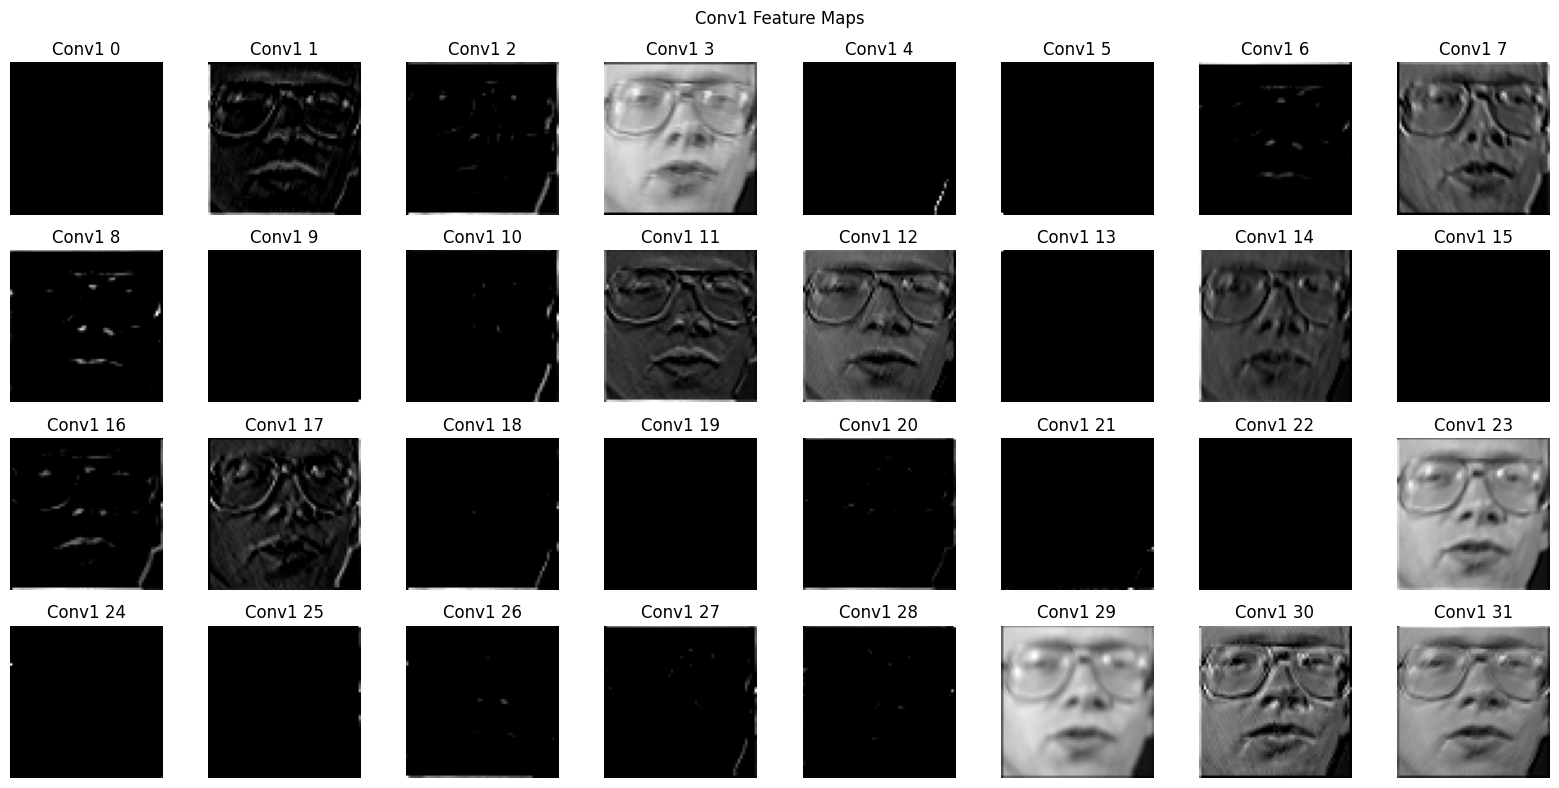

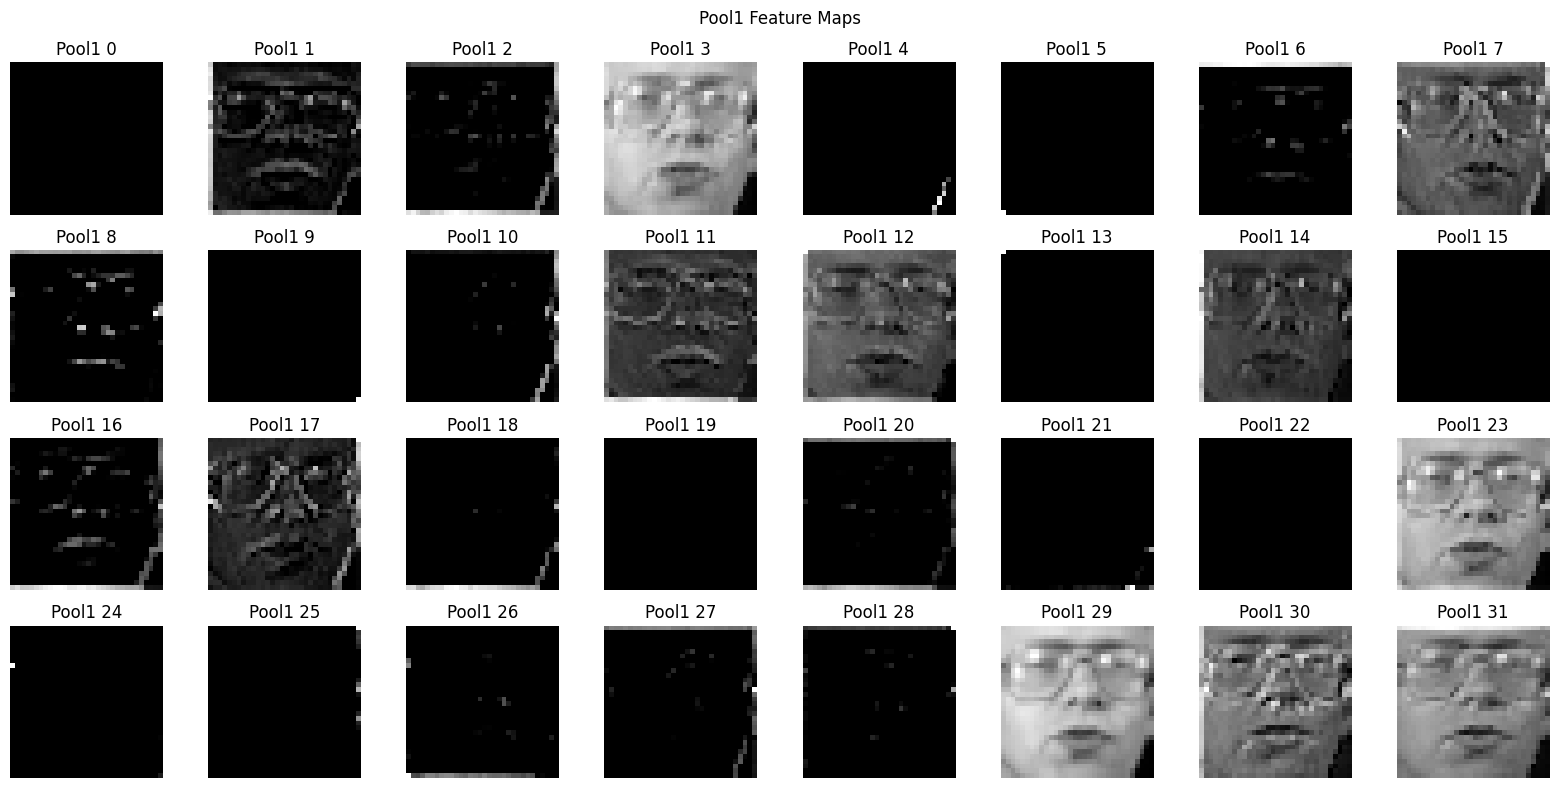

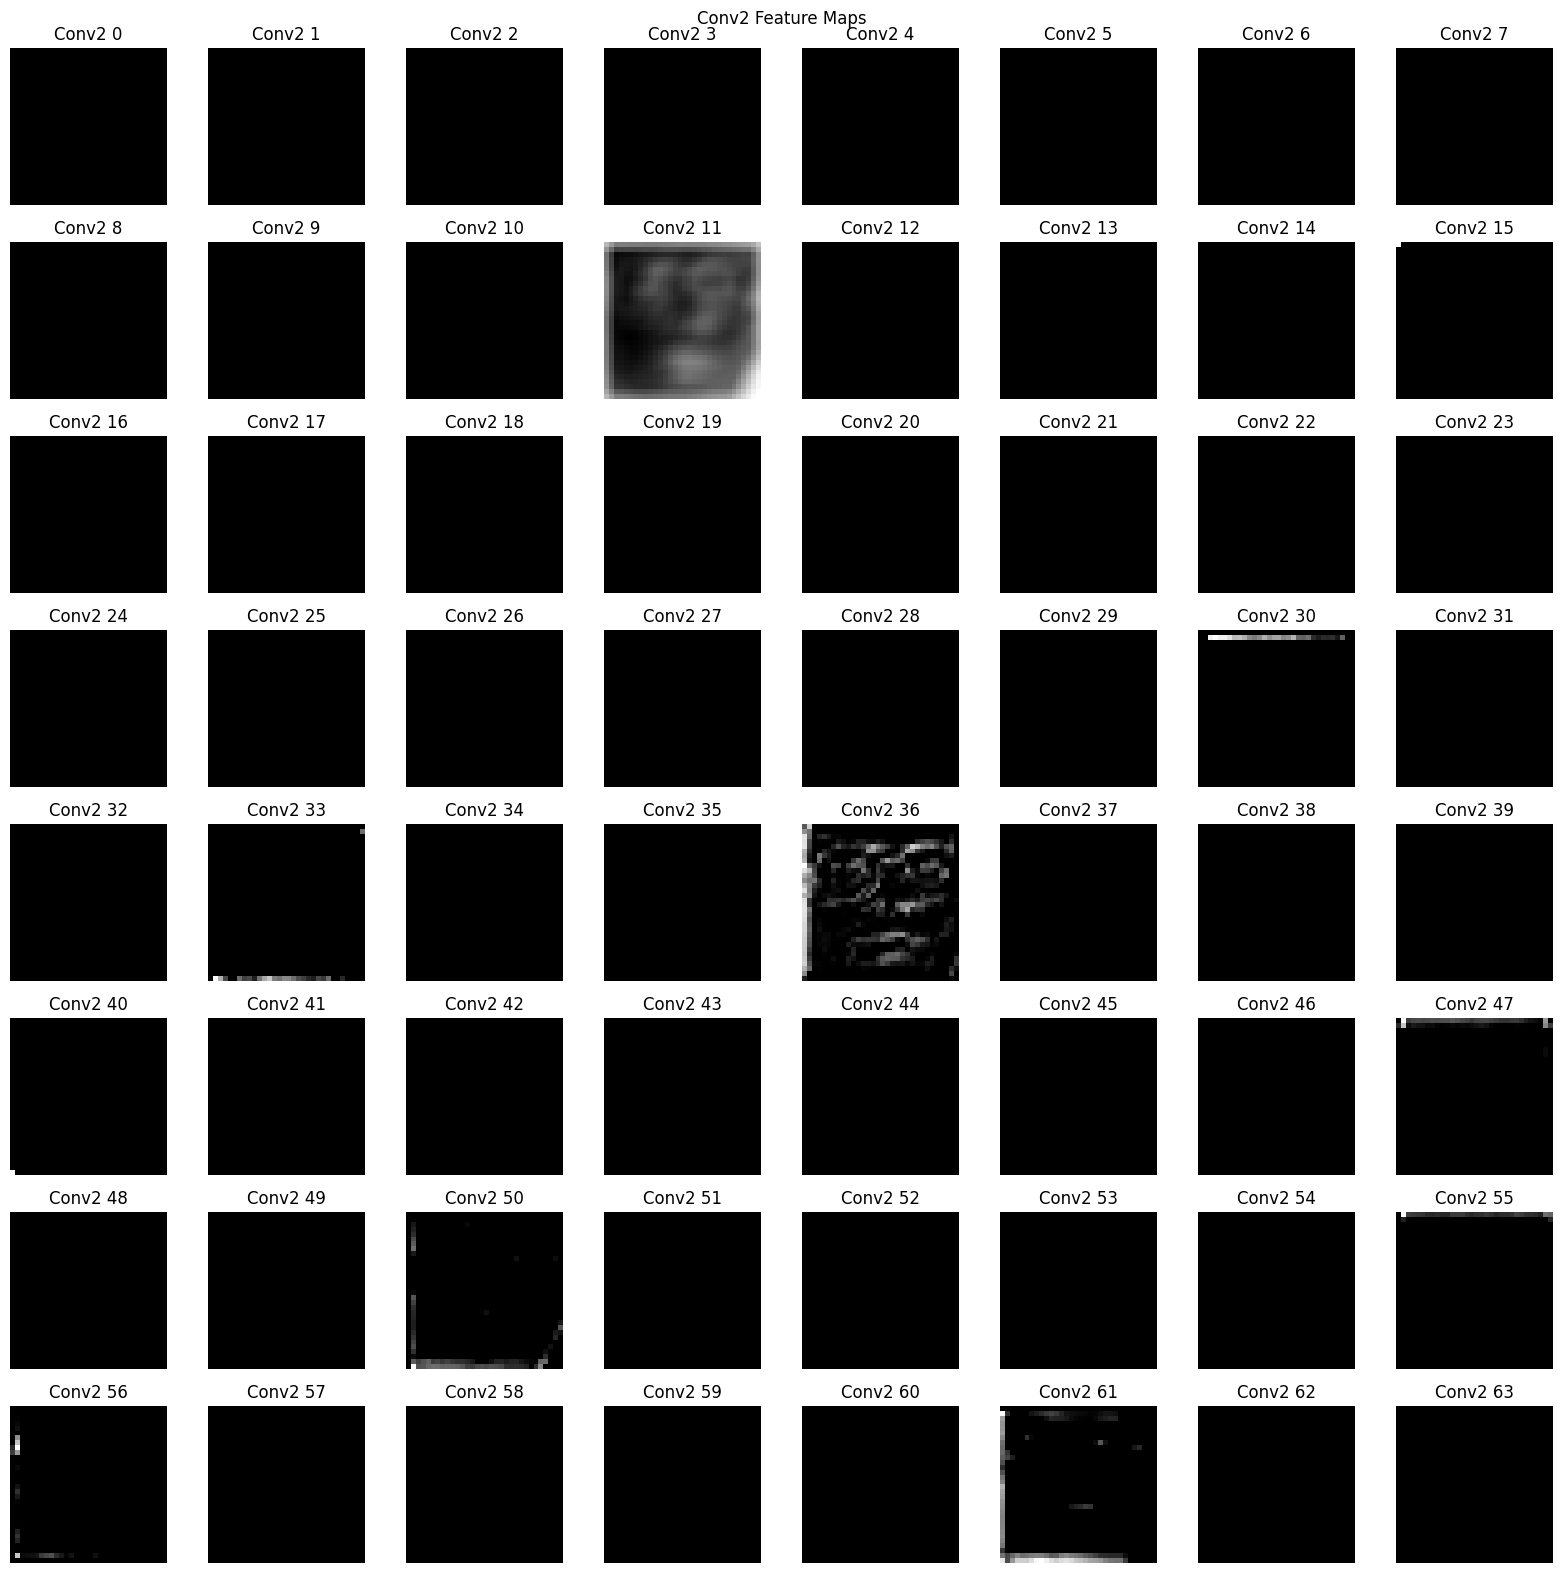

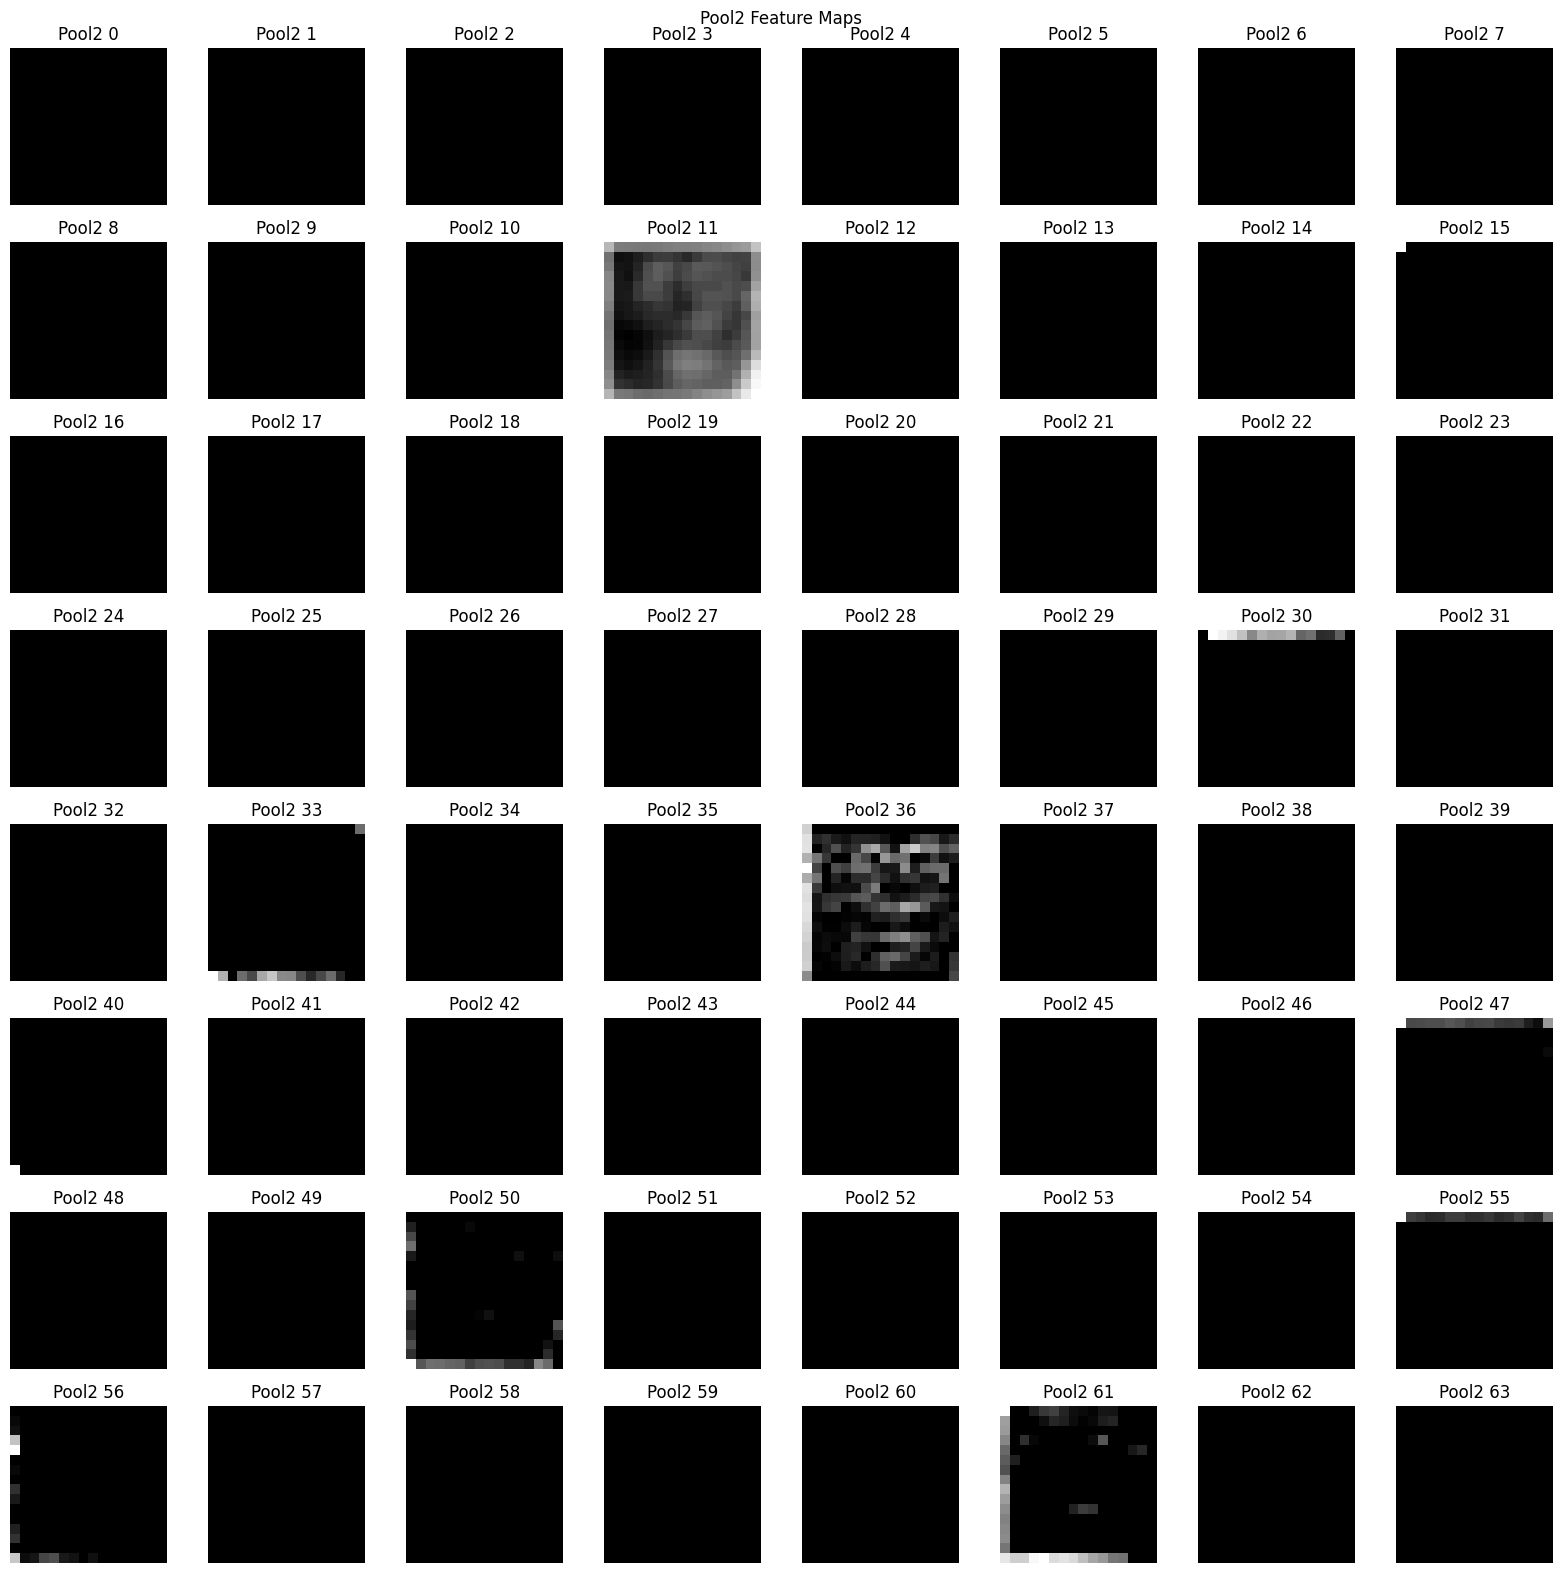

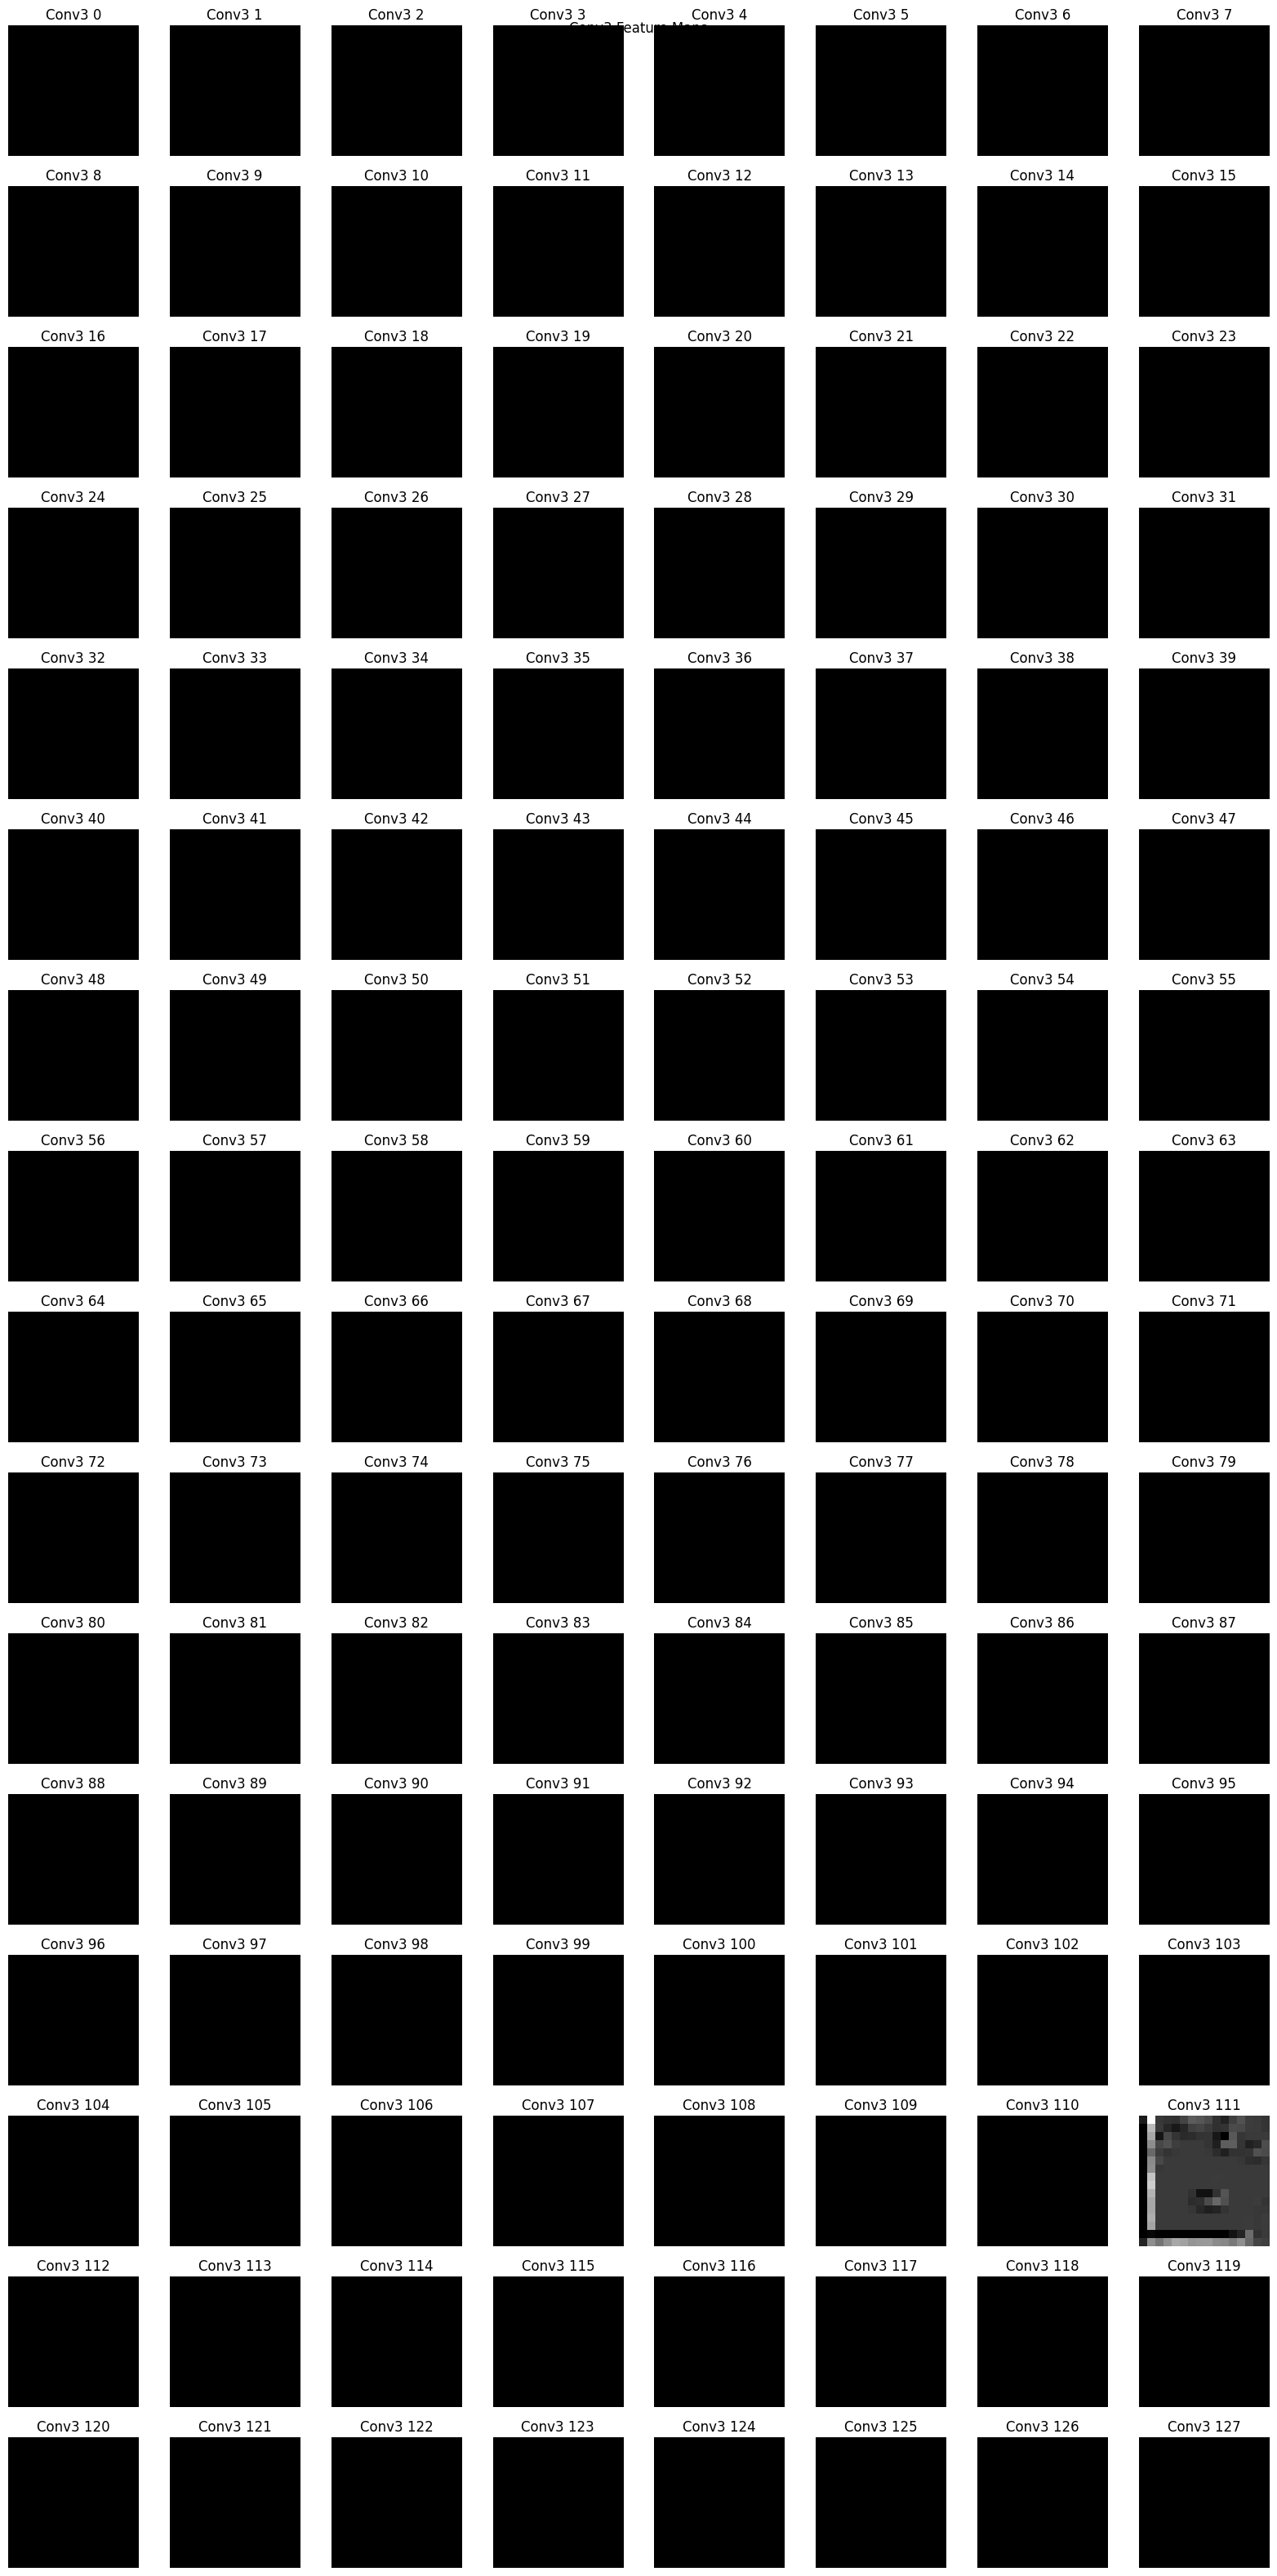

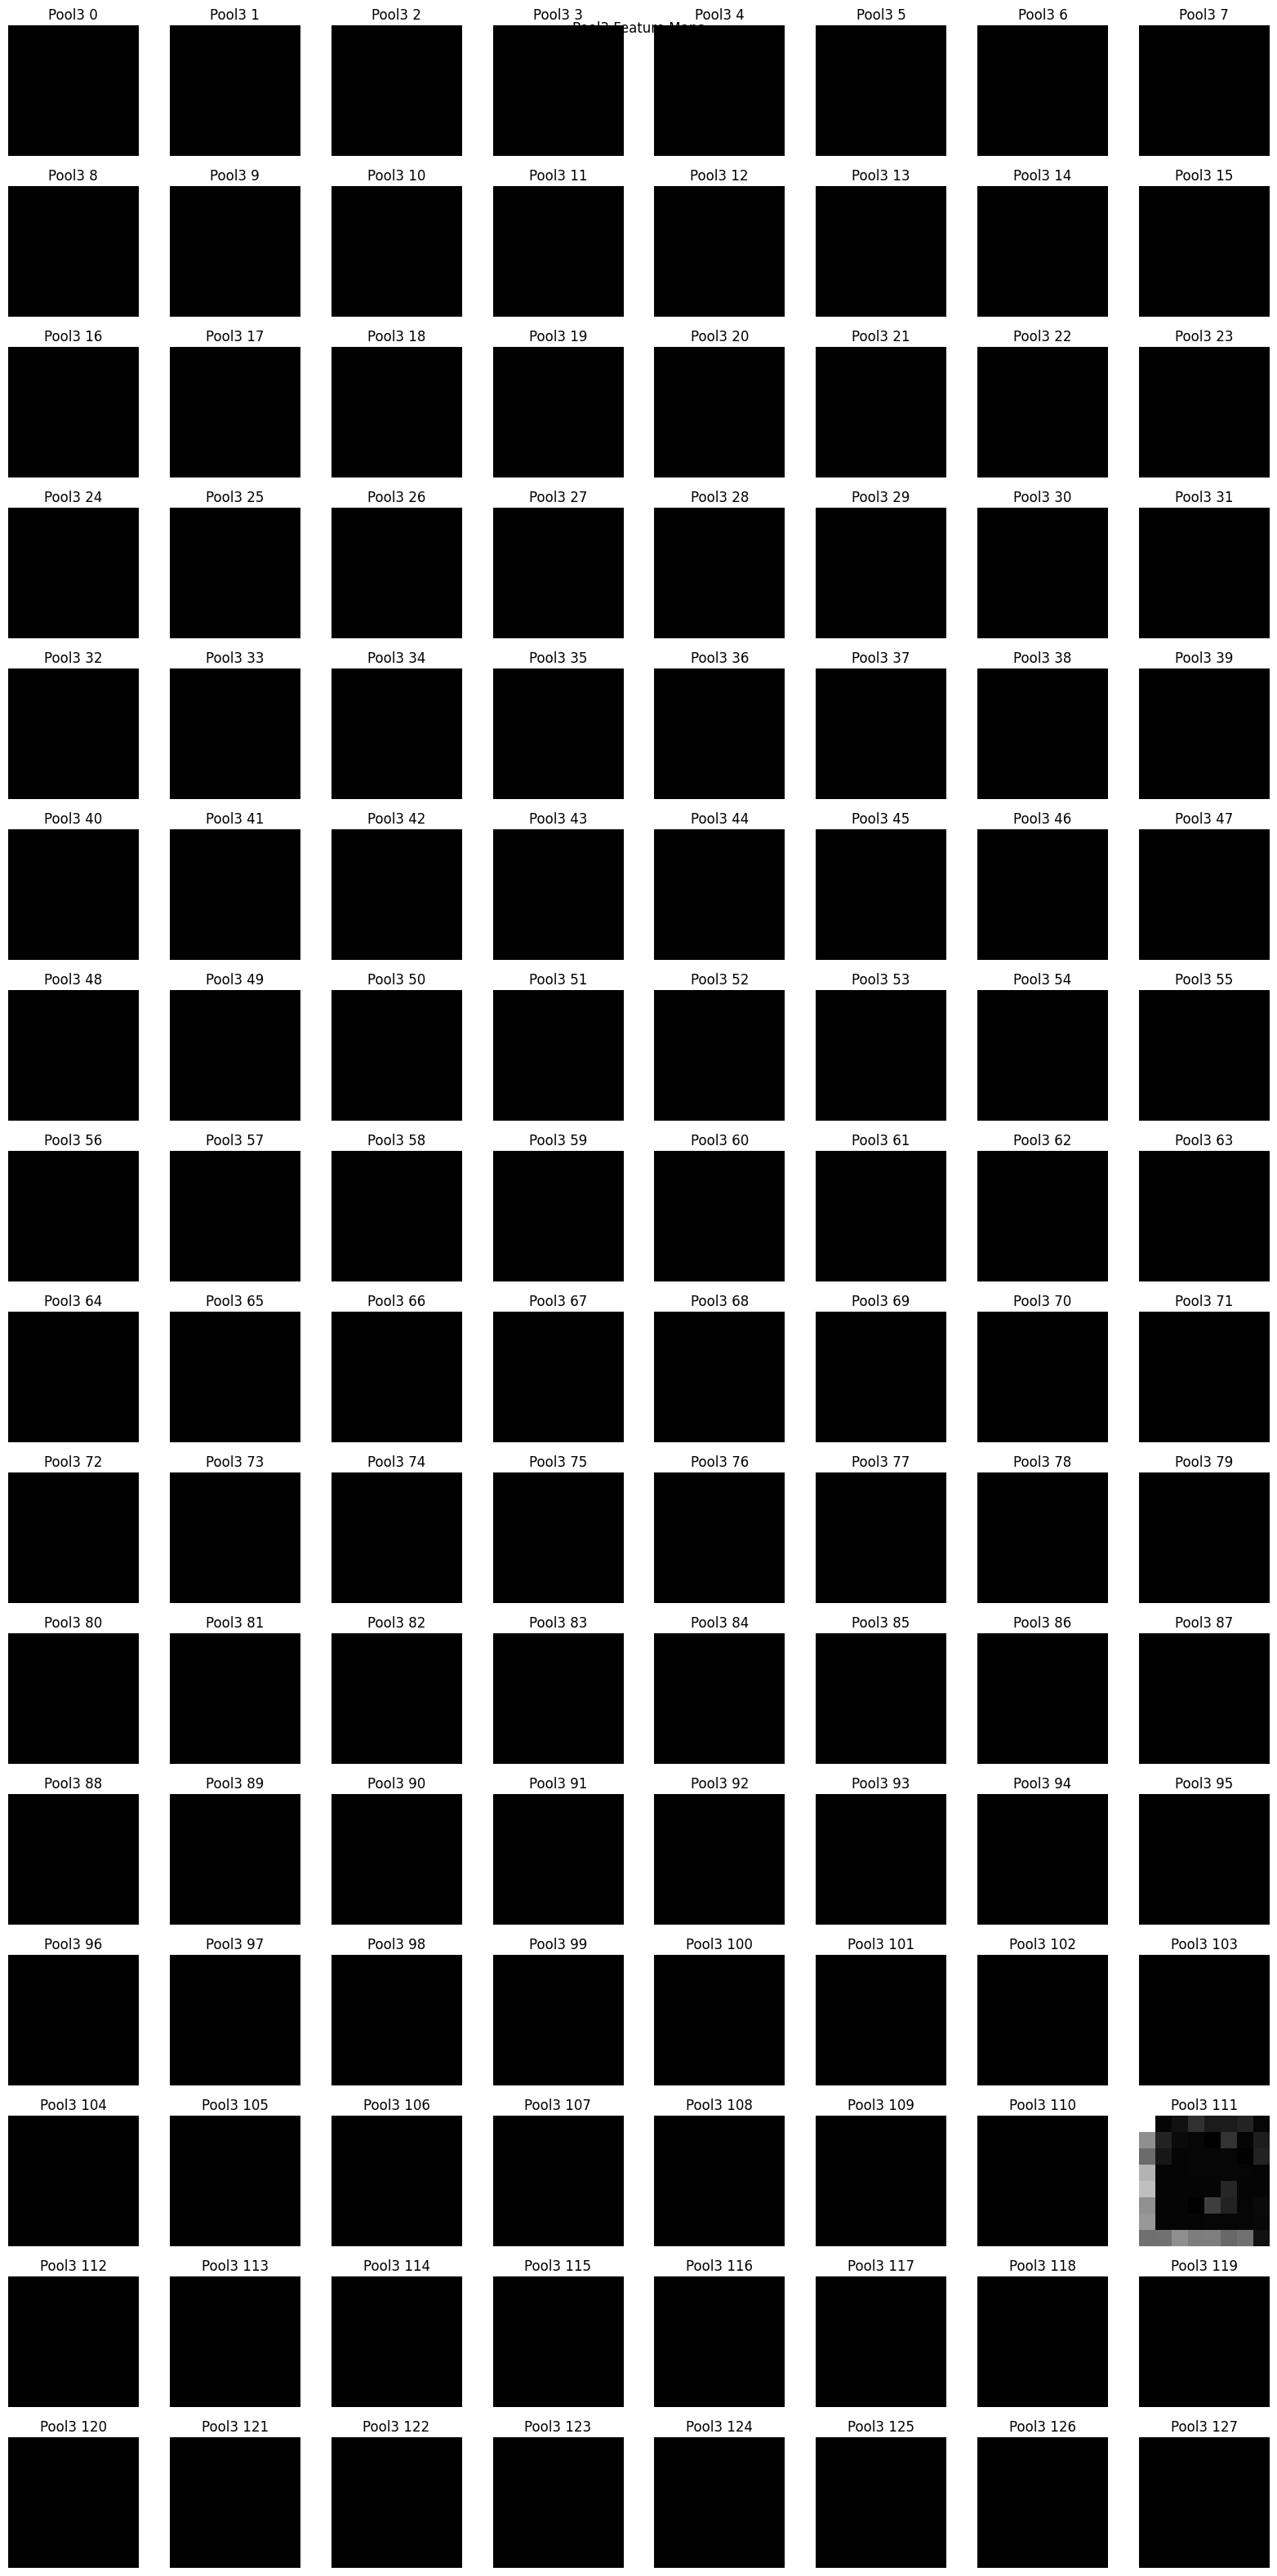

In [52]:

# Choose the same test image as before
img_idx = 6  # or whichever index you want
img = X_test_reshaped[img_idx]
img_batch = np.expand_dims(img, axis=0)  # Shape: (1, 64, 64, 1)

# Get the layers you want to visualize
conv1 = model3.layers[1]    # First Conv2D
pool1 = model3.layers[2]    # First MaxPooling2D
conv2 = model3.layers[3]    # Second Conv2D
pool2 = model3.layers[4]    # Second MaxPooling2D
conv3 = model3.layers[5]    # Third Conv2D
pool3 = model3.layers[6]    # Third MaxPooling2D

# Build a model that outputs all these layers' activations
activation_model3 = Model(
    inputs=model3.input,
    outputs=[conv1.output, pool1.output, conv2.output, pool2.output, conv3.output, pool3.output]
)

# Get the feature maps
conv1_features, pool1_features, conv2_features, pool2_features, conv3_features, pool3_features = activation_model3.predict(img_batch)

# Helper function to plot feature maps
def plot_feature_maps(feature_maps, title, num_cols=8):
    num_filters = feature_maps.shape[-1]
    num_rows = int(np.ceil(num_filters / num_cols))
    plt.figure(figsize=(2*num_cols, 2*num_rows))
    for i in range(num_filters):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='gray')
        plt.title(f'{title} {i}')
        plt.axis('off')
    plt.suptitle(f"{title} Feature Maps")
    plt.tight_layout()
    plt.show()

# Plot the feature maps
plot_feature_maps(conv1_features, "Conv1")
plot_feature_maps(pool1_features, "Pool1")
plot_feature_maps(conv2_features, "Conv2")
plot_feature_maps(pool2_features, "Pool2")
plot_feature_maps(conv3_features, "Conv3")
plot_feature_maps(pool3_features, "Pool3")


### Step 16: Reflection on Model 3

Write a few sentences describing how you optimized the model in this part. What worked well?

<span style="color:darkblue">
Both Model 1 and Model 2 performed similarly, achieving ~89–90% accuracy, which is outstanding for 40-way face classification on Olivetti.
Model 3, despite being deeper and more regularized, achieved only 82% accuracy, demonstrating that increased complexity can actually hurt performance when training data is limited.
The tiny margin between Models 1 and 2 is within the range of random variation and does not indicate a meaningful difference.
<span/>